In [ ]:
!pip install tensorflow

In [1]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ambik\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Using airline-passenger Dataset try to predict the number of passengers for next month,given the 
# number of passengers (in units of thousands) for this month 
# load dataset
import pandas as pd
data = pd.read_csv("C:/Users/ambik/OneDrive/Desktop/airline-passengers.csv")
print(data.shape)
data.head()


(144, 1)


,"""Month"",""Passengers"""
0,"""1949-01"",112"
1,"""1949-02"",118"
2,"""1949-03"",132"
3,"""1949-04"",129"
4,"""1949-05"",121"


In [3]:
#You can write a simple function to convert our single column of data into a two-column dataset: 
data['Month'],data['Passengers']=data['"Month","Passengers"'].str.split(',',1).str

C:\Users\ambik\AppData\Local\Temp\ipykernel_23136\4264833172.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Month'],data['Passengers']=data['"Month","Passengers"'].str.split(',',1).str


In [4]:
data

,"""Month"",""Passengers""",Month,Passengers
0,"""1949-01"",112","""1949-01""",112
1,"""1949-02"",118","""1949-02""",118
2,"""1949-03"",132","""1949-03""",132
3,"""1949-04"",129","""1949-04""",129
4,"""1949-05"",121","""1949-05""",121
...,...,...,...
139,"""1960-08"",606","""1960-08""",606
140,"""1960-09"",508","""1960-09""",508
141,"""1960-10"",461","""1960-10""",461
142,"""1960-11"",390","""1960-11""",390


In [5]:
data=data['Passengers']
data.shape

(144,)

In [6]:
data=np.array(data).reshape(-1,1)
data=data.astype('int64')

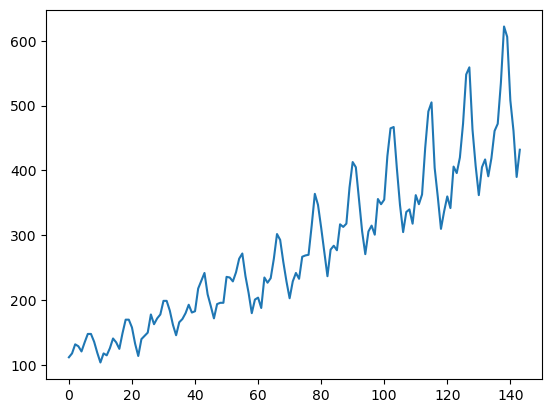

In [7]:
plt.plot(data)

In [8]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
data=Scaler.fit_transform(data)
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [9]:
train_size=100
test_size=44

In [10]:
train=data[0:train_size,:]
train.shape

(100, 1)

In [11]:
test=data[train_size:144,:]
test.shape

(44, 1)

In [12]:
# build train and test dataset
def get_data(data,look_back):
    data_X=[]
    data_Y=[]
    for i in range(len(data)-look_back-1):
        a=data[i:(i+look_back),0]
        data_X.append(a)
        data_Y.append(data[i+look_back,0])
    return np.array(data_X),np.array(data_Y)


In [13]:
#Splitting the data into training and test set
look_back=1
X_train, y_train=get_data(train,look_back)
X_train.shape


(98, 1)

In [14]:
y_train.shape

(98,)

In [15]:
X_test, y_test=get_data(test,look_back)
X_test.shape

(42, 1)

In [16]:
y_test.shape

(42,)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
X_train.shape

In [ ]:
# Fit an LSTM model on top of the data where the optimizer = ‘adam’ and epoch =’100’
loop_back=1
model=Sequential()
model.add(LSTM(4,input_shape=(1,loop_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=1)

In [ ]:
y_pred=model.predict(X_test)
y_pred=Scaler.inverse_transform(y_pred)
y_pred

In [ ]:
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=Scaler.inverse_transform(y_test)
y_test

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real no. of passenger')
plt.plot(y_pred,label='predicted no. of passenger')
plt.ylabel('# passenger')
plt.legend()
plt.show()

In [ ]:
# d. Build another model where optimizer = ‘sgd’ and epoch = ‘50
loop_back=1
model=Sequential()
model.add(LSTM(4,input_shape=(1,loop_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='sgd')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

In [ ]:
y_pred=model.predict(X_test)
y_pred=Scaler.inverse_transform(y_pred)
y_pred

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real no. of passenger')
plt.plot(y_pred,label='predicted no. of passenger')
plt.ylabel('# passenger')
plt.legend()
plt.show()